# Analysis of Arrests  of Persons for Major Offences in Singapore
### Data is obtained from Data.gov.sg

In [91]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandasql as ps
%matplotlib inline

In [18]:
url = 'https://data.gov.sg/dataset/islandwide-persons-arrested-for-selected-major-offences'

In [19]:
df = pd.read_csv('persons-arrested-for-selected-major-offences-by-age-group.csv')

#### Random sample 

In [20]:
df.sample(5)

,year,level_1,level_2,value
328,2014,Male Arrested For Snatch Theft,21 Years Old And Below,26
562,2017,Male Arrested For Outrage Of Modesty,21 Years Old And Below,101
231,2013,Female Arrested For Theft Of Motor Vehicle,Above 21 Years Old,0
794,2019,Total Persons Arrested For Serious Hurt,Youths (7 To 19 Years Old),36
376,2015,Female Arrested For Rape,21 Years Old And Below,0


In [159]:
Total_df= df[df['level_1'].str.contains('Total')]
Total_df = Total_df.sort_values('year').reset_index(drop=True)
Total_df

,year,level_1,level_2,value
0,2011,Total Persons Arrested For Murder,Above 21 Years Old,18
1,2011,Total Persons Arrested For Cheating & Related,Youths (7 To 19 Years Old),173
2,2011,Total Persons Arrested For Cheating & Related,21 Years Old And Below,271
3,2011,Total Persons Arrested For Cheating & Related,Above 21 Years Old,1376
4,2011,Total Persons Arrested For Serious Hurt,Youths (7 To 19 Years Old),43
...,...,...,...,...
265,2019,Total Persons Arrested For Murder,21 Years Old And Below,1
266,2019,Total Persons Arrested For Murder,Above 21 Years Old,27
267,2019,Total Persons Arrested For Cheating & Related,21 Years Old And Below,332
268,2019,Total Persons Arrested For Housebreaking,21 Years Old And Below,30


In [250]:
Total_df['value'].sum()
print("Total number of people arrested:", Total_df['value'].sum())

Total number of people arrested: 47875


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   year     810 non-null    int64 
 1   level_1  810 non-null    object
 2   level_2  810 non-null    object
 3   value    810 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 25.4+ KB


In [22]:
df.isnull().sum()

year       0
level_1    0
level_2    0
value      0
dtype: int64

#### Total of unique cases from 2011 to 2019

In [290]:
df_unique = df[df["level_1"].str.contains("Total")==False]
df_unique = df_unique['level_1'].drop_duplicates().reset_index(drop=True)
print("Number of unique cases:", 20)
df_unique

Number of unique cases: 20


0                       Male Arrested For Murder
1                     Female Arrested For Murder
2                         Male Arrested For Rape
3                       Female Arrested For Rape
4           Male Arrested For Outrage Of Modesty
5         Female Arrested For Outrage Of Modesty
6                      Male Arrested For Robbery
7                    Female Arrested For Robbery
8                Male Arrested For Housebreaking
9              Female Arrested For Housebreaking
10      Male Arrested For Theft Of Motor Vehicle
11    Female Arrested For Theft Of Motor Vehicle
12                Male Arrested For Snatch Theft
13              Female Arrested For Snatch Theft
14                     Male Arrested For Rioting
15                   Female Arrested For Rioting
16                Male Arrested For Serious Hurt
17              Female Arrested For Serious Hurt
18          Male Arrested For Cheating & Related
19        Female Arrested For Cheating & Related
Name: level_1, dtype

#### Finding out the number of adults above age 21 that were arrested

In [292]:
q1="""
SELECT  *
FROM df
WHERE level_2 = 'Above 21 Years Old'
"""
Adults_df = ps.sqldf(q1, locals())
Adults_df = Adults_df[Adults_df["level_1"].str.contains("Total")==False]
print("Total number of Adults arrested:", Adults_df['value'].sum())

Total number of Adults arrested: 32291


#### Finding out the number of youths that were arrested

In [295]:
q2="""
SELECT  *
FROM df
WHERE level_2 = 'Youths (7 To 19 Years Old)'
"""
Youths_df = ps.sqldf(q2, locals())
Youths_df = Youths_df[Youths_df["level_1"].str.contains("Total")==False]
print("Total number of Youths arrested:", Youths_df['value'].sum())

Total number of Youths arrested: 6674


#### Total people arrested in 2019

In [177]:
q3="""
SELECT  *
FROM Total_df
WHERE year = 2019
"""
Year2019_df = ps.sqldf(q3,locals())
print("Total number of people arrested in 2019:", Year2019_df['value'].sum())

Total number of people arrested in 2019: 5659


In [94]:
start_date =2011
end_date=2019
df2 = Youths_df.loc[(Youths_df['year'] >= start_date) & (Youths_df['year'] <= end_date) ].groupby(['year','level_2'])['value'].sum()

#### Simple bar illustration to observe the patterns of youths arrested

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '(2011, Youths)'),
  Text(1, 0, '(2012, Youths)'),
  Text(2, 0, '(2013, Youths)'),
  Text(3, 0, '(2014, Youths)'),
  Text(4, 0, '(2015, Youths)'),
  Text(5, 0, '(2016, Youths)'),
  Text(6, 0, '(2017, Youths)'),
  Text(7, 0, '(2018, Youths)'),
  Text(8, 0, '(2019, Youths)')])

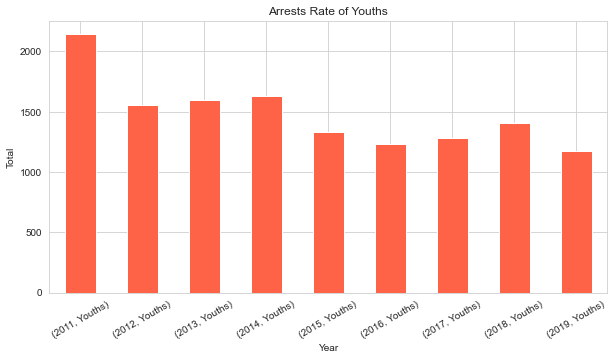

In [254]:
df2 = df2.rename({'Youths (7 To 19 Years Old)':'Youths'})
plt.figure(figsize=(10, 5))
sns.set_style('whitegrid')
df2.plot ( kind='bar', color = 'tomato')
plt.title('Arrests Rate of Youths')
plt.ylabel('Total')
plt.xlabel('Year')
plt.xticks(rotation=30)

#### Evidently as the years go by the crime rate of youths also decreased.

#### Now to observe the amounts of males arrested compared to females regardless of age

In [195]:
Male_df= df[df['level_1'].str.contains('Male')]
print("Total number of Males arrested:", Male_df['value'].sum())

Total number of Males arrested: 40190


In [196]:
Male_df = Male_df.loc[(Male_df['year'] >= start_date) & (Male_df['year'] <=end_date)].groupby(['year'])['value'].sum()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '2011'),
  Text(1, 0, '2012'),
  Text(2, 0, '2013'),
  Text(3, 0, '2014'),
  Text(4, 0, '2015'),
  Text(5, 0, '2016'),
  Text(6, 0, '2017'),
  Text(7, 0, '2018'),
  Text(8, 0, '2019')])

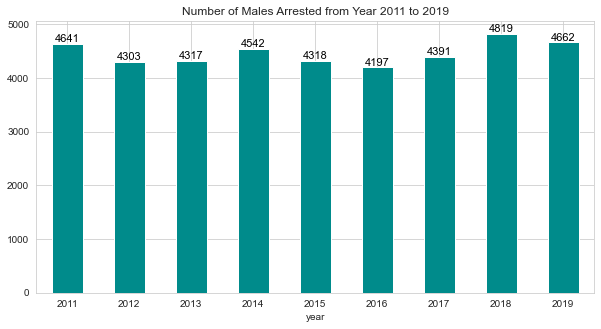

In [232]:
plt.figure(figsize =(10,5))
g = Male_df.plot ( x='year', y = 'value', kind='bar', color = 'darkcyan')
ax = g
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{0:.0f}'.format(p.get_height()),fontsize=11, color='black', ha='center', va='bottom')
plt.title("Number of Males Arrested from Year 2011 to 2019")
plt.xticks(rotation=0)

In [201]:
Female_df= df[df['level_1'].str.contains('Female')]
print("Total number of Females arrested:", Female_df['value'].sum())

Total number of Females arrested: 7685


In [203]:
Female_df = Female_df.loc[(Female_df['year'] >= start_date) & (Female_df['year'] <= end_date)].groupby(['year'])['value'].sum()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '2011'),
  Text(1, 0, '2012'),
  Text(2, 0, '2013'),
  Text(3, 0, '2014'),
  Text(4, 0, '2015'),
  Text(5, 0, '2016'),
  Text(6, 0, '2017'),
  Text(7, 0, '2018'),
  Text(8, 0, '2019')])

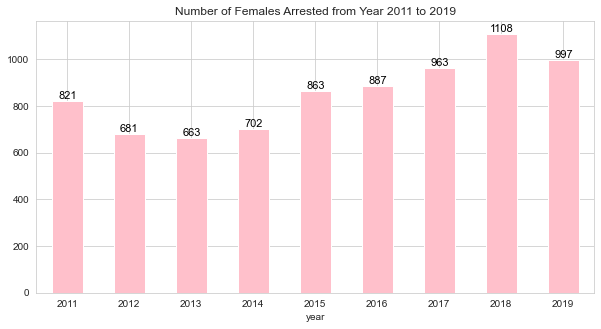

In [218]:
plt.figure(figsize=(10,5))
g = Female_df.plot( x='year', y = 'value', kind ='bar', color = 'pink')
ax = g
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{0:.0f}'.format(p.get_height()),fontsize=11, color='black', ha='center', va='bottom')
plt.title ('Number of Females Arrested from Year 2011 to 2019')
plt.xticks(rotation =0)


##### So it turns out that within the span of 9 years, totals males arressted for various crimes were about 4 times more compared to females , regardless of the age group, with male counts staying consistent above 4000 every year, while female totals were under 1000 with only eyar 2018 having the highest number of arrests being 1108 arrests.

#### Since the total numbers of arrests for male and female are known respectively, a pie chart can be manually made to showcase the percentage difference 

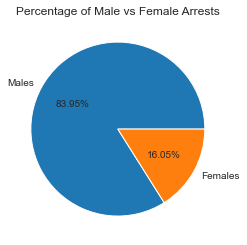

In [248]:
labels = 'Males', 'Females'
sizes = [40190, 7685]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.2f%%')
ax1.axis=('equal')
plt.title('Percentage of Male vs Female Arrests')
plt.show()

#### So in conclusion, with males arrests being a majority compared to females, with 83.95% male vs 16.05% females, generally, it is very likely that any various sort of crimes that could happen in Singapore are more likely being committed by the male population.